# Part 5.

This last part of the exercise is theoretical and does not involve code execution.

<u>Questions</u> (1 point):
1. Provide a comparison, with data and plots, among the four alternatives we have developed to solve the problem.
2. Justify, based on the data, which of the semi-supervised methods is the best.

Disclaimer: This is an overall, yet detailed, summary of the entire set of  experiments performed through this practice. For a more in depth evaluation and analysis go and check each of the separate experiments that you can find attached below, keep in mind that these should also be available in the deliverable zip if you are my professor, if you are not, feel free to check these experiments out on my github):

[Experiment 1](https://github.com/Neilus03/Semi-Supervised_Learning/blob/main/EX1_PRA1_Neil.ipynb)

[Experiment 2](https://github.com/Neilus03/Semi-Supervised_Learning/blob/main/EX2_PRA1_Neil.ipynb)

[Experiment 3](https://github.com/Neilus03/Semi-Supervised_Learning/blob/main/EX3_PRA1_Neil.ipynb)

[Experiment 4](https://github.com/Neilus03/Semi-Supervised_Learning/blob/main/EX4_PRA1_Neil%20(2).ipynb)

## **Summary**

On this project we´ve dived in the semi-supervised/self-supervised learning world, it was really interesting and exciting to make this experiment eventhough it was super time consuming, and involved a lot of quite complex coding skills.

With that said, let´s review what our steps have been, from the very first baseline CNN up to 'Cluster then labelling' approaches.

### **1. Base CNN model:**

To start up we built a CNN model that was trained on the whole Fahion MNIST training set, this was done in order to have a benchmark and something to compare our other approaches with, a kind of benchmark. To do that, we first loaded the data and splitted training and validation sets. This training and validation sets were key as they´d be the ones we played with during the whole project.

The validation set was untouched and unmodified through the whole practice, and it was used to evaluate every single model we´ve built. So for now, lets focuss on the training set.

For the very first baseline CNN we trained the CNN on all the training set as I mentioned, and got some results (that we´ll later analyze).


### **2. CNN with reduced training set:**

As a second benchmark, we wanted to know how the CNN would perform with restricted training data. Now instead of letting the CNN be trained on 60k images, It was just trained on 10k.

Then these two benchmarks should act as an upper and lowerbound for the semi-supervised learning algorithms we are going to test. Self-supervised learning should improve the lower bound performance of the 10k-image-trained CNN but shouldn´t surpass the performance of the upperbound 60k-image-trained CNN.


### **3. Self supervised learning, using thresholds:**

For this step of the experiment, I wanted to start my CNN training with 10k images and go progrssively increasing the amount of training images based on a threshold. So I wanted to train the CNN, get the predictions for the rest of 50k training images that I settled as unlabelled and then at each iteration, go adding the most confidently predicted labels to the labelled training set. I knew this would for sure insert noise on the data but still shoud be worth it as hopefully we´d be including much more correctly predicted labels than not. And there´s where the thresholds come in. I did the whole training process several times, once per threshold. This threshold is the confidence a prediction has to surpass in order to make it to the labelled training set. Thus, the higher the threshold, the less new data would enter in the training set, but the better its quality. The goal was to experiment and find out a good trade-off. Where we added enough data to improve performance but adding as little noise as possible. This was certainly a challenge but I ended up figuring out how to automatize the whole process and I´ll later analyze results in depth.


### **4. Self supervisedly Cluster, then label:**

Last, but not least, the approach we are tackling is by far the most impressive and unexpected to me. So the goal was to first fit a kmeans on the 10k training data and let it generate 10 clusters, one per label. Then, iteratively we´d be adding 10k  unlabelled datapoints to its closest class/cluster, assume that the assignment was well and repeat. This loop would keep up until no datapoint is unlabelled. This approach seemed crazy but does actually have sense, Kmeans is good in finding clusters and segmentating the datapoints so at the end, in an n-dimensional space, it could cluster each datapoint to its closest class quite well. Then centroids would be recomputed and we´ll do the whole loop once again. Finally we´d get every single unlabelled datapoint labelled back and we will be able to train our classifier on the whole 60k training images, with the lables generated by the clustering algorithm.

Then I did the exact same process for Mini Batch Kmeans. The goal was to compare both algorithms performances and then Classify using our previously built CNN on the labels generated by the best clustering algorithm.

Is worth to note that I tried GMM´s before MBK-means, but I don´t manage to get why it didn´t ever fully run. It kept running for hours until colab crashed. I had lots of hopes in gmm as they cluster data with gaussians assigning each datapoint a probability of belonging to a set instead of the strict clustering of the radial function of K-means. Nevertheless I didn´t manage to get GMM running so sadly I had to pass to MB-kmeans even though I knew it´d perform worse. I also tried DBSCAN but it works with densities and I had quite a lot of problems setting the semi-supervised learning up well adapted for DBSCAN so I ended up giving up with it as well. Nonetheless, the effort put on those other algorithms, from its understanding to its implementation was nothing but totally worth it. I learnt a lot and even though they cannnot be presented due to its uncompleteness I am proud of having tried and dedicating a lot of time to them as well.



## **Results and Plots**

On this section I will make an in depth analysis of the results for each experiment, how did they work and why. I plot every confusion matrix just below in an ordered way as I think that there´s no better plot to understand what´s going on hidden under the sun.


### **Base CNN model results:**

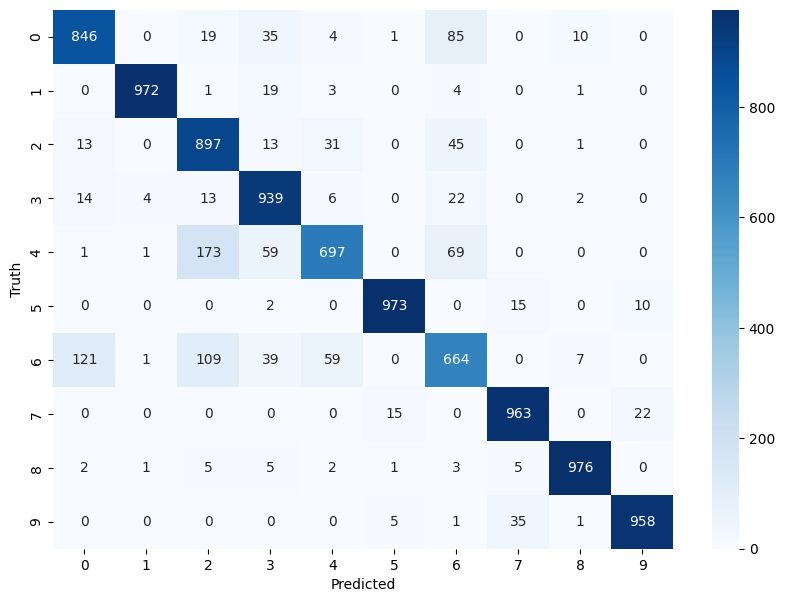

This model was, as explained, trained on the whole original training set and evaluated, as every other model, in the validation (or test) set.

It must be stated that we were limited to 5 epochs training for the model, so even if the training log plots that can be found in its individual notebook show that it hasn´t converged, we had to early stop training. Then this models accuracy could have been much higher, according to my experiments, up to 97% accuracy.

Nonetheless, the results for this base model are self explanatory. It performs great, and serves us as a benchmark to compare other models.




*   Accuracy: 88.85%
*   Recall: 88.85%
*   F1-score: 88.73%







### **Restricted training set CNN results:**

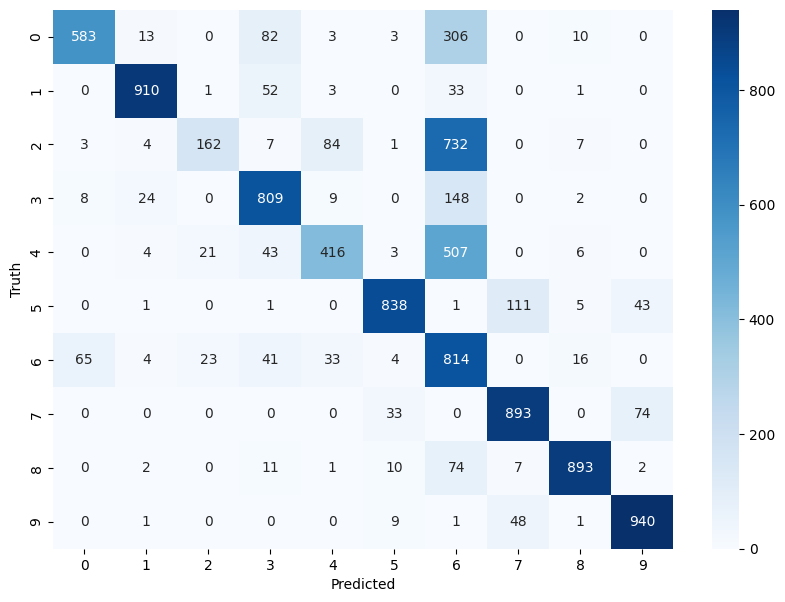

This model was trained supervisedly on 10k images, thus its performance is much worse. Is actually important to note that the dataset was not stratified, then its more than likely that when cutting off the training dataset to its ~15%, some classes may end up underrepresented. I doubted of doing this but instructions did not mention noting about stratification so I thought that sticking to the rules would be a better idea overall.

Thus this are the results I got with the restricted training set, which, as mentioned before, should serve us as a lowerbound benchmark.

*   Accuracy: 72.58%
*   Recall: 72.58%
*   F1-score: 72.59%

Is good to remember that due to the stochasticity of SGD, every time I train on this data results are different, previous results lead to F1-scores ranging [70%-80%]

### **Self-Supervised CNN results:**

#### **FOR 0.6 THRESHOLD**

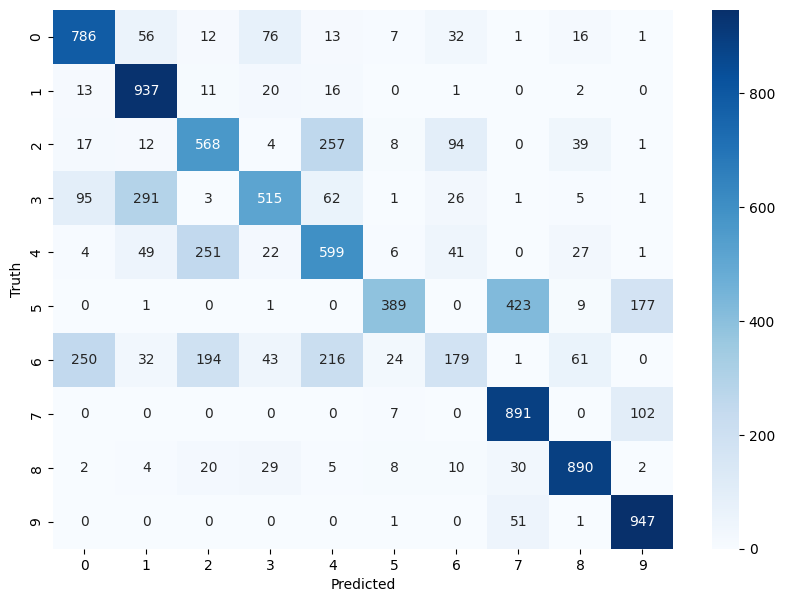




Final Metrics:
*   Accuracy: 67.01%
*   Recall: 67.01%
*   F1-score: 64.74%


Having such a low threshold compromised results, let's explain why this happened:

We settled a threshold that was quite low and this allowed the model to self supervisedly label too many images, despite its high probability to label them wrong (from 0 to 40%), this led the model to be trained on very noisy data, and even if the amount of data was big, the quality of labels was no so, and the trade-off did not make sense. In this case, we did not even surpass the lowerbound model trained on 10k images, which means that we had better not used self-supervised learning if we used this threshold for this dataset and model.





#### **FOR 0.7 THRESHOLD**

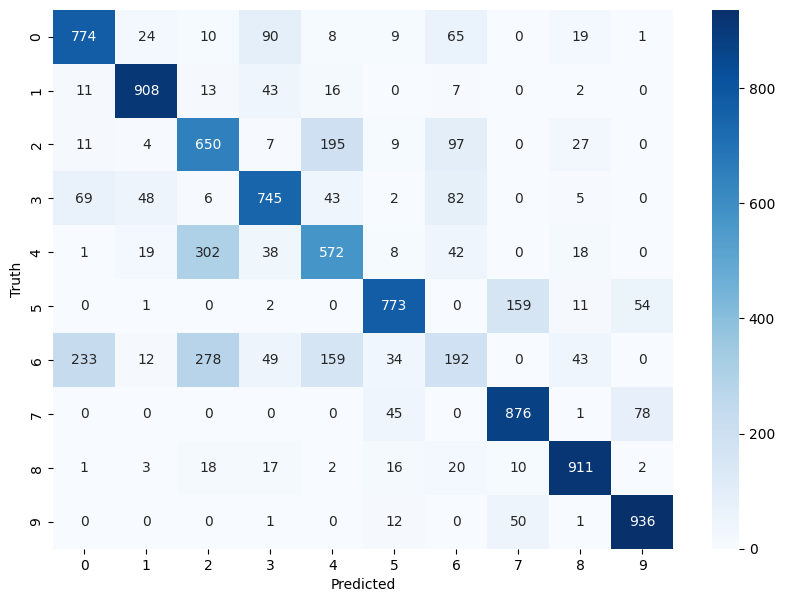

Final Metrics:

*   Accuracy: 73.37%
*   Recall: 73.37%
*   F1-score: 72.29%


As we increased the threshold, higher quality labels got in, avoiding the big amount of noise we had and results got much better. At this point we slightly surpassed the lowerbound limit that we spoke about with the 10k-image-trained base CNN





#### **FOR 0.8 THRESHOLD**

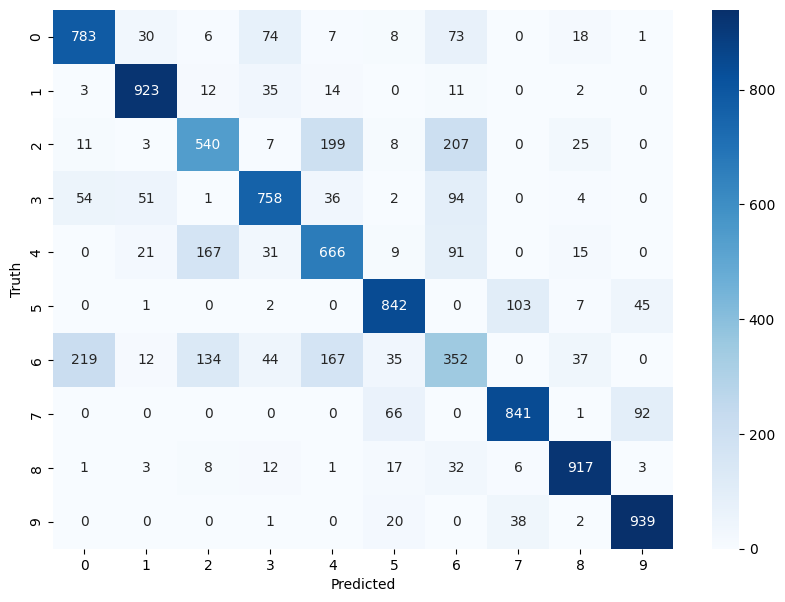

Final Metrics:

*   Accuracy: 75.61%
*   Recall: 75.61%
*   F1-score: 75.18%

We keep improving, even if we are adding less images we are avoiding noise, and for the tame the trade-off is benefitial. Let´s see what happens if we keep increasing the threshold.

#### **FOR 0.9 THRESHOLD**

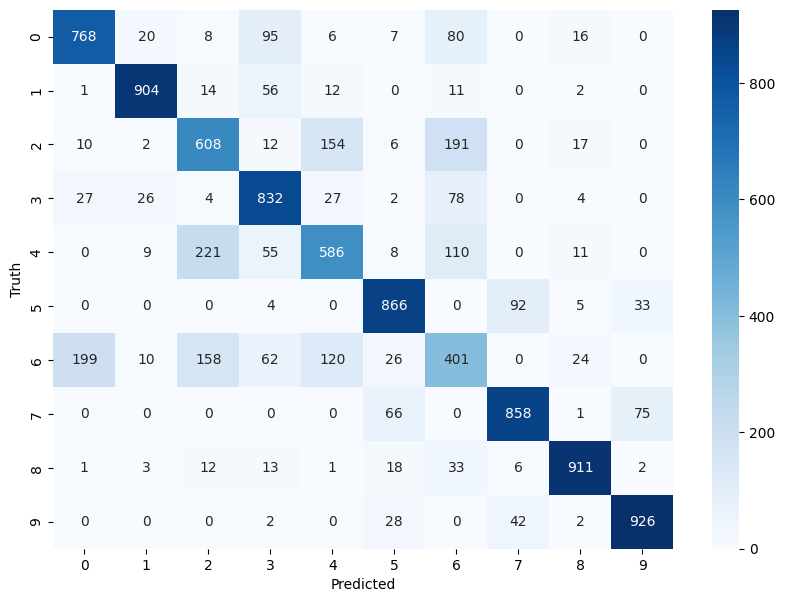

Final Metrics:


*   Accuracy: 76.60%
*   Recall: 76.60%
*   F1-score: 76.36%


We can now see that we seem to be converging as the metrics have not improved a lot eventhough we increase the threshold in 0.1 points. This means that from this point on, increasing the threshold wouldnt be beneficial, as we wouldn't let almost any image in, even if these would be almost perfectly confident assignments. i.e. We´d end up training in 15k images well annotated against the 30k images where 26k well annotated that we´d have trained on with threshold 0.9.

This was indeed a very interesting and enlighting experiment.

### **Semi-Supervisedly cluster then label results:**

As mentioned earlier, the model that performed the best for the clustering part was kmeans, with these being its assignations along the process:

1st iteration:


*   Correctly classified: 6410
*   Incorrectly classified: 3590

2nd iteration:

*   Correctly classified: 6837
*   Incorrectly classified: 3163

3rd iteration:

*   Correctly classified: 6189
*   Incorrectly classified: 3811

4th iteration:

*   Correctly classified: 5129
*   Incorrectly classified: 4871

5th iteration:

*   Correctly classified: 2795
*   Incorrectly classified: 7205

As you can see, an interesting phenomena happens, cluster assignments keep getting worse along the iterations, this happens because noise is being introduced to the clusters at each iteration, so we end up classifying (clustering) many of the samples wrong.

Nonetheless, we have a good amount of data, that overcomes the noise, and which leads to a good performance when classifying with our CNN.

Results being the following:

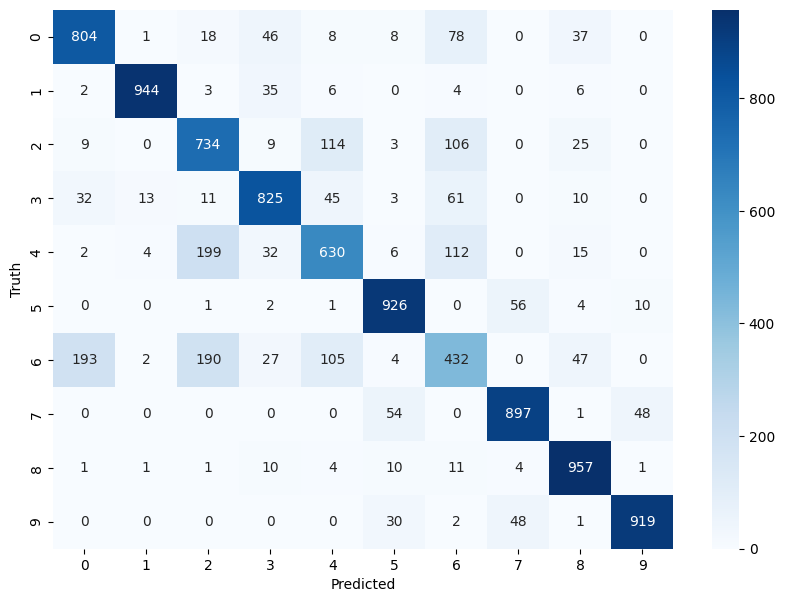

Final Metrics:

*   Accuracy: 80.68%
*   Recall: 80.68%
*   F1-score: 80.37%



This results are quite impressive, and talk good about the capacity of K-Means, which didn´t work with confidence intervals but with closeness based on distance. After that I run the same CNN also evaluated on Validation set. Results were good even though they were nothing close to the upperbound benchmark which was 88%.

# **OVERALL CONCLUSSIONS**





After conducting a series of semi-supervised and self-supervised learning experiments, distinct trends and conclusions emerged. The Base CNN model trained on the entire Fashion MNIST dataset served as the upper benchmark with an accuracy of 88.85%, while the restricted training set model served as the lower benchmark with an accuracy of 72.58%. The self-supervised learning approach with different confidence thresholds showed a clear trade-off between label quality and quantity. For instance, a threshold of 0.6 led to inferior performance due to excessive noise, while a 0.9 threshold showed diminishing returns, indicating an optimal balance around 0.8-0.9. In terms of metrics, the models with self-supervised learning reached up to 76.60% accuracy, showing a considerable improvement over the lower benchmark.

The 'Cluster then Label' strategy offered a unique and valuable insight into the capability of unsupervised clustering algorithms for semi-supervised learning tasks. K-Means outperformed Mini Batch K-means and provided an impressive final accuracy of 80.68%, which is significantly closer to the upper benchmark compared to other approaches. However, it was observed that the quality of clustering deteriorated over iterations, indicating the accumulation of label noise. Despite this, the sheer volume of correctly clustered data outweighed the impact of noise, leading to good classification performance. Among the semi-supervised methods tested, the 'Cluster then Label' approach using K-Means was the most effective in terms of final classification metrics, closing the performance gap between the lower and upper benchmarks to a significant extent.

Engaging in these experiments has been a genuinely enlightening experience, providing not just academic value but also immense personal satisfaction. Navigating the intricacies of semi-supervised and self-supervised learning approaches, confronting challenges with various clustering algorithms, and wrestling with the trade-offs of different thresholds made this a truly immersive and educational journey. Even the setbacks and limitations were instructive, shedding light on what not to do or consider in future work. The endeavor, while time-consuming and demanding, has been worth every minute spent, offering a holistic view of how different methods can converge to solve complex problems in machine learning. This practice embodies the essence of hands-on learning, and the insights gained will undoubtedly inform future academic and professional pursuits.